# Analisis exploratorio de los datasets

- PMEmo
- MEDIAEVAL

In [39]:
import os
import pandas as pd
import numpy as np
import plotly.express as px

from dotenv import load_dotenv


## PMEmo

### Cargar los archivos de anotaciones V/A del dataset PMEmo

In [2]:
# Cargar el archivo de variables de entorno
load_dotenv()

True

In [3]:
# Comprobar que el archivo de variables de entorno exista
A_PMEMO_DIR = os.getenv('PMEMO_ANOTATIONS')

if os.path.exists(A_PMEMO_DIR) and os.path.isdir(A_PMEMO_DIR):
    print("El directorio A_PMEMO_DIR existe")
else:
    print("El directorio A_PMEMO_DIR no existe")

El directorio A_PMEMO_DIR existe


In [4]:
# Listar archivos de anotaciones
anotations_files = os.listdir(A_PMEMO_DIR)

anotations_files = [os.path.join(A_PMEMO_DIR,x) for x in anotations_files]

for f in anotations_files:
    print(f)


E:\python_proy\mer\assets\PMEMO\PMEmo2019\annotations\dynamic_annotations.csv
E:\python_proy\mer\assets\PMEMO\PMEmo2019\annotations\dynamic_annotations_std.csv
E:\python_proy\mer\assets\PMEMO\PMEmo2019\annotations\static_annotations.csv
E:\python_proy\mer\assets\PMEMO\PMEmo2019\annotations\static_annotations_std.csv


In [5]:
# Anotaciones dinamicas
dyn_anot = pd.read_csv(anotations_files[0])
print(dyn_anot.info())
print("----------------------------------------------------------------")
print(dyn_anot.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36434 entries, 0 to 36433
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   musicId        36434 non-null  int64  
 1   frameTime      36434 non-null  float64
 2   Arousal(mean)  36434 non-null  float64
 3   Valence(mean)  36434 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.1 MB
None
----------------------------------------------------------------
            musicId     frameTime  Arousal(mean)  Valence(mean)
count  36434.000000  36434.000000   36434.000000   36434.000000
mean     526.579349     31.036710       0.632710       0.606817
std      295.667299     12.519469       0.176853       0.160098
min        1.000000     15.500000       0.095437       0.106562
25%      277.000000     21.500000       0.514228       0.499675
50%      539.000000     28.000000       0.657556       0.630675
75%      788.000000     37.500000       0.777000       0.735

In [6]:
#Anotaciones dinamicas std
dyn_anot_std = pd.read_csv(anotations_files[1])

print(dyn_anot_std.info())
print("----------------------------------------------------------------")
print(dyn_anot_std.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36434 entries, 0 to 36433
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   musicId       36434 non-null  int64  
 1   frameTime     36434 non-null  float64
 2   Arousal(std)  36434 non-null  float64
 3   Valence(std)  36434 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.1 MB
None
----------------------------------------------------------------
            musicId     frameTime  Arousal(std)  Valence(std)
count  36434.000000  36434.000000  36434.000000  36434.000000
mean     526.579349     31.036710      0.290183      0.316347
std      295.667299     12.519469      0.096060      0.092165
min        1.000000     15.500000      0.072205      0.068932
25%      277.000000     21.500000      0.219707      0.252787
50%      539.000000     28.000000      0.281541      0.310846
75%      788.000000     37.500000      0.351772      0.379066
max     1000.00000

In [7]:
#Anotaciones estaticas
sta_anot = pd.read_csv(anotations_files[2])

print(sta_anot.info())
print("----------------------------------------------------------------")
print(sta_anot.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   musicId        767 non-null    int64  
 1   Arousal(mean)  767 non-null    float64
 2   Valence(mean)  767 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 18.1 KB
None
----------------------------------------------------------------
           musicId  Arousal(mean)  Valence(mean)
count   767.000000     767.000000     767.000000
mean    493.770535       0.622355       0.596581
std     285.958166       0.184812       0.161986
min       1.000000       0.087500       0.125000
25%     238.500000       0.500000       0.487500
50%     495.000000       0.650000       0.625000
75%     739.500000       0.762500       0.725000
max    1000.000000       0.975000       0.912500


In [8]:
#Anotaciones estaticas std
sta_anot_std = pd.read_csv(anotations_files[3])

print(sta_anot_std.info())
print("----------------------------------------------------------------")
print(sta_anot_std.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   musicId       767 non-null    int64  
 1   Arousal(std)  767 non-null    float64
 2   Valence(std)  767 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 18.1 KB
None
----------------------------------------------------------------
           musicId  Arousal(std)  Valence(std)
count   767.000000    767.000000    767.000000
mean    493.770535      0.147390      0.164211
std     285.958166      0.047480      0.045941
min       1.000000      0.050000      0.057282
25%     238.500000      0.112500      0.130504
50%     495.000000      0.141973      0.160078
75%     739.500000      0.176997      0.193851
max    1000.000000      0.316475      0.313498


### Cuantos archivos de audio existen en el dataset

In [9]:
AUDIO_PMEMO_DIR = os.getenv("PMEMO_AUDIO")

if os.path.exists(AUDIO_PMEMO_DIR) and os.path.isdir(AUDIO_PMEMO_DIR):
    print("El directorio AUDIO_PMEMO_DIR existe")
else:
    print("El directorio AUDIO_PMEMO_DIR no existe")

El directorio AUDIO_PMEMO_DIR existe


In [10]:
audio_files = os.listdir(AUDIO_PMEMO_DIR)
print(f'Hay {len(audio_files)} archivos de audio')

Hay 794 archivos de audio


### Metadata de los archivos

In [11]:
pmemo_metadata = pd.read_csv(os.getenv('PMEMO_META'))
print(pmemo_metadata.info())
print('------------------------------------------------------------')
print(pmemo_metadata.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   musicId            794 non-null    int64  
 1   fileName           794 non-null    object 
 2   title              794 non-null    object 
 3   artist             794 non-null    object 
 4   album              787 non-null    object 
 5   duration           794 non-null    float64
 6   chorus_start_time  794 non-null    object 
 7   chorus_end_time    794 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 49.8+ KB
None
------------------------------------------------------------
           musicId    duration
count   794.000000  794.000000
mean    487.847607   38.016360
std     285.248735   14.199771
min       1.000000   11.080000
25%     235.250000   28.090000
50%     485.500000   36.130000
75%     731.750000   45.140000
max    1000.000000   88.240000


### Canciones con y sin anotaciones

In [12]:
#Obtener los ids unicos de la columna musicId anotaciones dy
dyn_anot_ids = dyn_anot['musicId'].unique()
print(f"ids unicos de anotaciones dinamicas: {dyn_anot_ids.shape}")

#Obtener los ids unicos de la columna musicId anotaciones st
sta_anot_ids = sta_anot['musicId'].unique()
print(f'ids unicos de anotaciones estaticas: {sta_anot_ids.shape}')

ids unicos de anotaciones dinamicas: (767,)
ids unicos de anotaciones estaticas: (767,)


In [13]:
#Comparar si ambas anotaciones tienen los mismos ids

if np.array_equal(dyn_anot_ids,sta_anot_ids):
    print("Ambos arrays tienen los mismos datos")
else:
    print("No tienen los mismos datos")
    

if np.array_equal(np.sort(dyn_anot_ids),np.sort(sta_anot_ids)):
    print("Ambos arrays tienen los mismos datos")
else:
    print("No tienen los mismos datos")

Ambos arrays tienen los mismos datos
Ambos arrays tienen los mismos datos


In [14]:
#Obtener ids que no tienen anotaciones

#ids totales
ids = pmemo_metadata['musicId'].unique()

#Obtener ids que no cuentan con anotaciones
ids_no_anot = np.setdiff1d(ids,dyn_anot_ids)

print(f"{ids.shape[0]} - {dyn_anot_ids.shape[0]} = {ids.shape[0] - dyn_anot_ids.shape[0]}")
print(ids_no_anot)

794 - 767 = 27
[ 11  64  85  95 101 110 118 205 206 226 264 278 291 311 320 352 359 371
 384 392 404 459 464 596 610 687 866]


In [15]:
#Metadatos de las canciones con anotaciones
pmemo_meta_anot = pmemo_metadata[~pmemo_metadata['musicId'].isin(ids_no_anot)]

print(pmemo_meta_anot.info())

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 793
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   musicId            767 non-null    int64  
 1   fileName           767 non-null    object 
 2   title              767 non-null    object 
 3   artist             767 non-null    object 
 4   album              760 non-null    object 
 5   duration           767 non-null    float64
 6   chorus_start_time  767 non-null    object 
 7   chorus_end_time    767 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 53.9+ KB
None


In [16]:
#Metadatos de las canciones sin anotaciones
not_pmemo_meta_anot = pmemo_metadata[pmemo_metadata['musicId'].isin(ids_no_anot)]

print(not_pmemo_meta_anot.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 8 to 702
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   musicId            27 non-null     int64  
 1   fileName           27 non-null     object 
 2   title              27 non-null     object 
 3   artist             27 non-null     object 
 4   album              27 non-null     object 
 5   duration           27 non-null     float64
 6   chorus_start_time  27 non-null     object 
 7   chorus_end_time    27 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.9+ KB
None


In [17]:
print(dyn_anot[['musicId','frameTime']].tail())

       musicId  frameTime
36429     1000       75.0
36430     1000       75.5
36431     1000       76.0
36432     1000       76.5
36433     1000       77.0


Todos los clips de audio para anotaciones dinámicas fueron segmentados en clips de audio de 0.5 sec, pero la segmentación del audio, para todos los archivos de audio, comienza en el segundo 15.5 y así hasta el final del audio.

In [18]:
dyn_anot_framtimes = dyn_anot.drop_duplicates(subset='musicId',keep='first')

print(dyn_anot_framtimes[['musicId','frameTime']])

print(f"El primer valor donde inicia la segmentacion de clips:{dyn_anot_framtimes['frameTime'].unique()}")



       musicId  frameTime
0            1       15.5
34           4       15.5
60           5       15.5
198          6       15.5
227          7       15.5
...        ...        ...
36022      993       15.5
36106      996       15.5
36176      997       15.5
36262      999       15.5
36310     1000       15.5

[767 rows x 2 columns]
El primer valor donde inicia la segmentacion de clips:[15.5]


## Grafico de dispersion de los datos

In [38]:
#Unir el nombre de la cancion con los datos de Valence y Arousal
test_muestreo = dyn_anot.copy()
del test_muestreo['frameTime']
#test_muestreo.drop('frameTime',axis=1,inplace=True)
test_info = pmemo_meta_anot.copy()
test_info = test_info[['musicId','title']]

test_df = pd.merge(test_muestreo,test_info,on='musicId')
test_df.head(5)

,musicId,Arousal(mean),Valence(mean),title
0,1,0.437663,0.559975,Good Drank
1,1,0.437775,0.560650,Good Drank
2,1,0.443125,0.559900,Good Drank
3,1,0.442887,0.560212,Good Drank
4,1,0.444563,0.563337,Good Drank


In [47]:
fig = px.scatter(test_df,x='Valence(mean)',y='Arousal(mean)',
                 labels={'titulo':'title'},
                 title='Grafico de dispercion anotaciones dinamicas',
                 color='title')

# Ajustar el tamaño del gráfico
fig.update_layout(width=3000, height=1000)

fig.show()

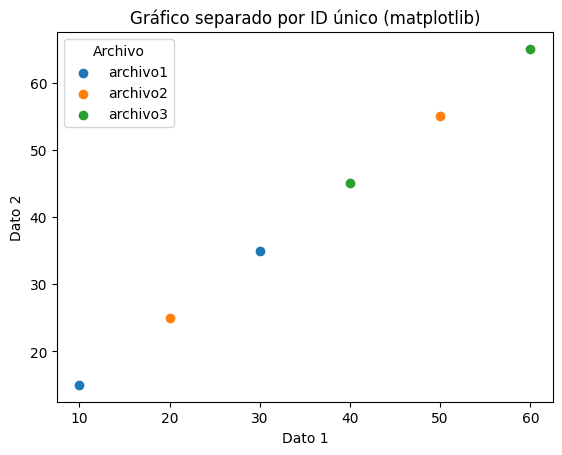

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Ejemplo de DataFrames
df_muestreo = pd.DataFrame({
    'id': [1, 2, 1, 3, 2, 3],
    'dato1': [10, 20, 30, 40, 50, 60],
    'dato2': [15, 25, 35, 45, 55, 65]
})

df_metadatos = pd.DataFrame({
    'id': [1, 2, 3],
    'nombre_archivo': ['archivo1', 'archivo2', 'archivo3']
})

# Combina los DataFrames usando el ID
df_comb = pd.merge(df_muestreo, df_metadatos, on='id')

# Grafica usando diferentes colores por archivo
for archivo in df_comb['nombre_archivo'].unique():
    df_filtrado = df_comb[df_comb['nombre_archivo'] == archivo]
    plt.scatter(df_filtrado['dato1'], df_filtrado['dato2'], label=archivo)

plt.xlabel('Dato 1')
plt.ylabel('Dato 2')
plt.legend(title='Archivo')
plt.title('Gráfico separado por ID único (matplotlib)')
plt.show()
